In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib as plt

In [58]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [59]:
train = train[["target","comment_text"]]
train["label"] = [1 if i >= 0.5 else 0 for i in train["target"]]
train, valid = train_test_split(train, test_size=0.33, random_state=42)

In [64]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train["comment_text"])
X_valid = vectorizer.transform(valid["comment_text"])
X_test = vectorizer.transform(test["comment_text"])

#print(vectorizer.get_feature_names())

#pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())

In [61]:
model = LogisticRegression()
model.fit(X, train["label"])
p = model.predict_proba(X_valid)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


label
0.0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1.0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

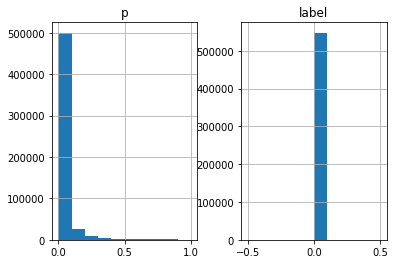

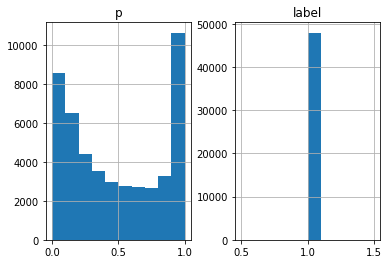

In [62]:
dfp = pd.DataFrame(np.concatenate((np.transpose([p[:,1]]), valid[["label"]].values), axis=1), columns = ["p", "label"])
dfp.groupby('label').hist()

In [63]:
fpr, tpr, thresholds = roc_curve(valid["label"], p[:,1], pos_label=1)
auc(fpr, tpr)


0.9471737723199679

In [65]:
p_test = model.predict_proba(X_test)

In [66]:
test["prediction"] = p_test[:,1]

In [67]:
test[["id", "prediction"]].to_csv("/tmp/submission.csv", index=False)